In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import glob

from IPython.display import Audio
import soundfile as sf
import librosa
import scipy

# Importar as bases de dados

In [2]:
noisefiles = glob.glob('../../bases_vozes/urbansound_8k/*.wav')
files = glob.glob('../../bases_vozes/Base_Vozes_IFPB/banco de vozes_mono/vozes_nome/Vozes Mono/**/*.wav')

print(f'Quantidade de ruido {len(noisefiles)}')
print(f'Quantidade de sons {len(files)}')

Quantidade de ruido 8732
Quantidade de sons 91


## Exemplo de fala

In [3]:
rand_int = np.random.randint(0, len(files)-1)
y, fs = librosa.load(files[rand_int])
samples = len(y)
length = samples/fs
print(rand_int)
print(f'Quantidade de amostras: {samples} amostras')
print(f'Taxa de amostragem: {fs}Hz')
print(f'Número de canais: {len(y.shape)}')
print(f'Tamanho do sinal: {length}s')

64
Quantidade de amostras: 14084 amostras
Taxa de amostragem: 22050Hz
Número de canais: 1
Tamanho do sinal: 0.6387301587301587s


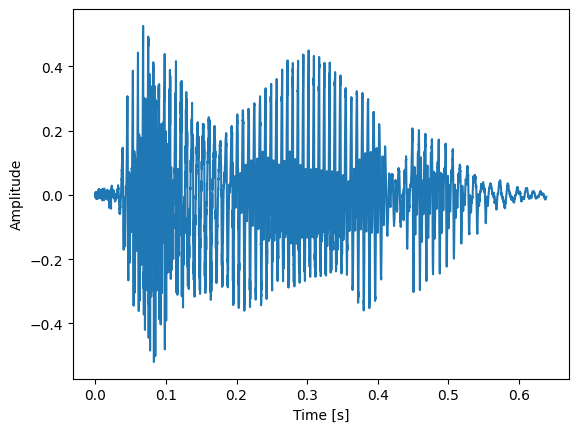

In [4]:
time = np.linspace(0., length, y.shape[0])
plt.plot(time, y)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [5]:
Audio(y, rate=fs)

## Exemplo de ruído

In [54]:
rand_int = np.random.randint(0, len(noisefiles)-1)
y_noise, fs = librosa.load(noisefiles[87])
samples = len(y_noise)
length = samples/fs

print(rand_int)
print(f'Quantidade de amostras: {samples} amostras')
print(f'Taxa de amostragem: {fs}Hz')
print(f'Número de canais: {len(y_noise.shape)}')
length = samples/fs
print(f'Tamanho do sinal: {length}s')

2898
Quantidade de amostras: 78278 amostras
Taxa de amostragem: 22050Hz
Número de canais: 1
Tamanho do sinal: 3.5500226757369613s


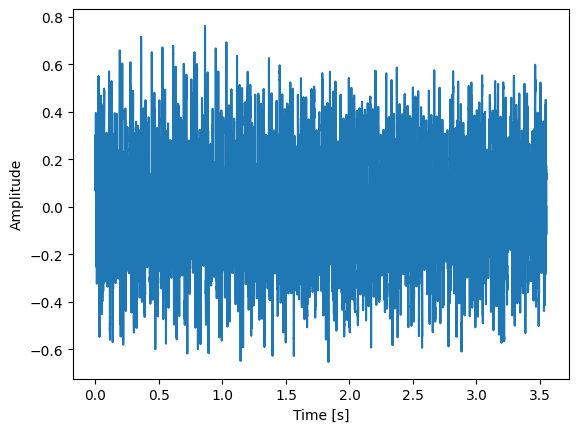

In [55]:
time = np.linspace(0., length, y_noise.shape[0])
plt.plot(time, y_noise)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [57]:
Audio(y_noise, rate=fs)

## fft

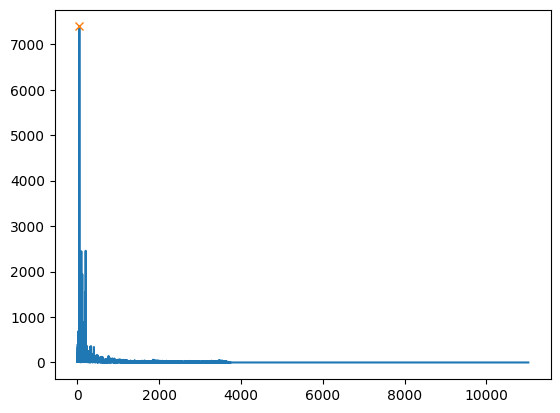

Frequencia fundamental : 47.605329722271904 Hz


In [60]:
yk = abs(np.fft.rfft(y_noise))
freqs = np.arange(len(yk))
freqs = freqs * fs / samples

plt.plot(freqs, yk)
#plt.xlim([0, 100])
plt.plot(np.where(yk == max(yk))[0][0]*fs/samples, np.max(yk), "x")
plt.show()
print(f'Frequencia fundamental : {np.where(yk == max(yk))[0][0]*fs/samples} Hz')

## Ruído fornecido

In [6]:
rand_int = np.random.randint(0, len(noisefiles)-1)
y_noise, fs = librosa.load('../matlab/projeto01/sound005.wav')
samples = len(y_noise)
length = samples/fs

print(rand_int)
print(f'Quantidade de amostras: {samples} amostras')
print(f'Taxa de amostragem: {fs}Hz')
print(f'Número de canais: {len(y_noise.shape)}')
length = samples/fs
print(f'Tamanho do sinal: {length}s')

3256
Quantidade de amostras: 53184 amostras
Taxa de amostragem: 22050Hz
Número de canais: 1
Tamanho do sinal: 2.411972789115646s


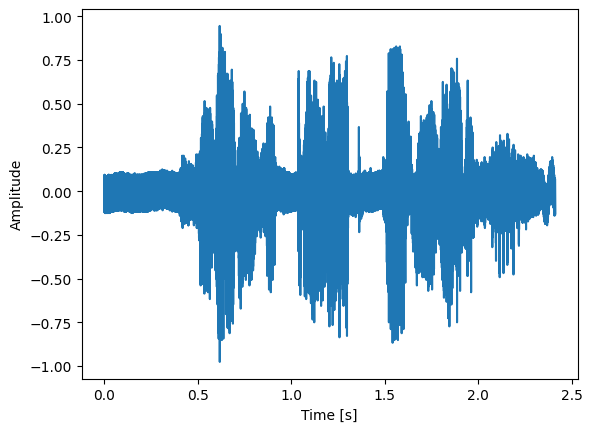

In [8]:
time = np.linspace(0., length, y_noise.shape[0])
plt.plot(time, y_noise)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [9]:
Audio(y_noise, rate=fs)

## fft

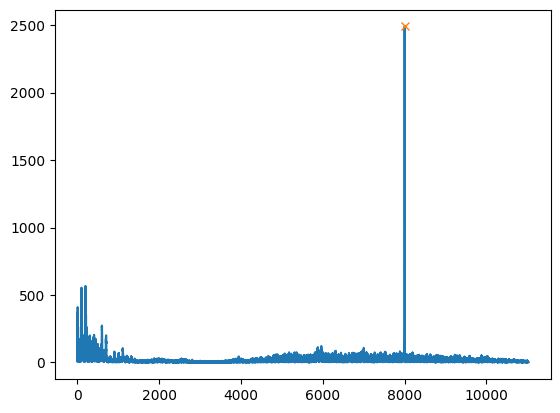

Frequencia fundamental : 8000.090252707581 Hz


In [53]:
yk = abs(np.fft.rfft(y_noise))
freqs = np.arange(len(yk))
freqs = freqs * fs / samples

plt.plot(freqs, yk)
#plt.xlim([6000, 9000])
plt.plot(np.where(yk == max(yk))[0][0]*fs/samples, np.max(yk), "x")
plt.show()
print(f'Frequencia fundamental : {np.where(yk == max(yk))[0][0]*fs/samples} Hz')

In [12]:
coeficientes = scipy.signal.firwin(16, 5000, width=None, window='hamming', pass_zero=True, scale=True, nyq=None, fs=fs)

In [13]:
w, h = scipy.signal.freqz(coeficientes, 1)

In [14]:
fs

22050

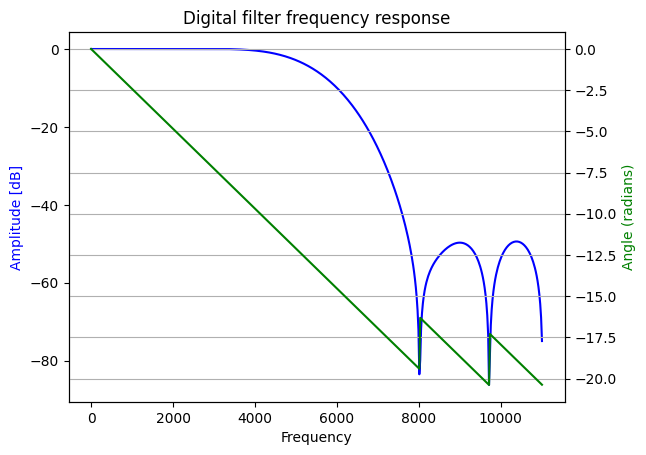

In [15]:
b = scipy.signal.firwin(18, 5550, window='hamming', fs=fs)
w, h = scipy.signal.freqz(b, fs=fs)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')

ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()

In [16]:
Audio(y_noise, rate=fs)

In [17]:
y = scipy.signal.filtfilt(b, 1, y_noise)
Audio(y, rate=fs)

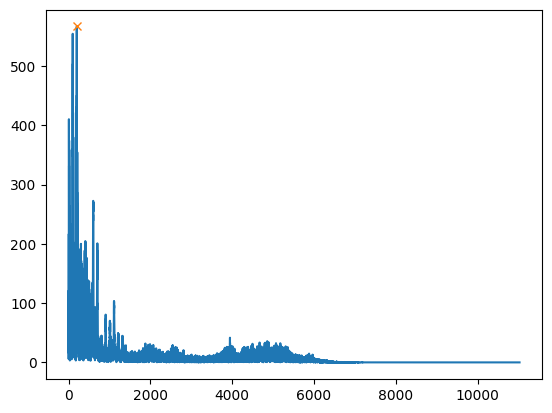

Frequencia fundamental : 198.59262184115522 Hz


In [18]:
yk = abs(np.fft.rfft(y))
freqs = np.arange(len(yk))
freqs = freqs * fs / samples

plt.plot(freqs, yk)
#plt.xlim([3000, 8000])
plt.plot(np.where(yk == max(yk))[0][0]*fs/samples, np.max(yk), "x")
#plt.axvline(x = 45.6, color = 'r')
#plt.axvline(x = 49.6, color = 'r')
plt.show()
print(f'Frequencia fundamental : {np.where(yk == max(yk))[0][0]*fs/samples} Hz')

# Filtro IIR

In [19]:
# filter with passband within 3 dB from 20 to 50 rad/s, while rejecting at least -40 dB below 14 and above 60 rad/s.

In [20]:
fpp = 4000
fss = 8000
fcc = 5500

In [46]:
wp = fpp / (fs / 2)
ws = fss / (fs / 2)
wc = fcc / (fs / 2)

b, a = scipy.signal.butter(5, wc, 'low')

In [47]:
print(wp, ws, wc)

0.36281179138321995 0.7256235827664399 0.4988662131519274


In [48]:
y = scipy.signal.filtfilt(b, a, y_noise)
Audio(y, rate=fs)

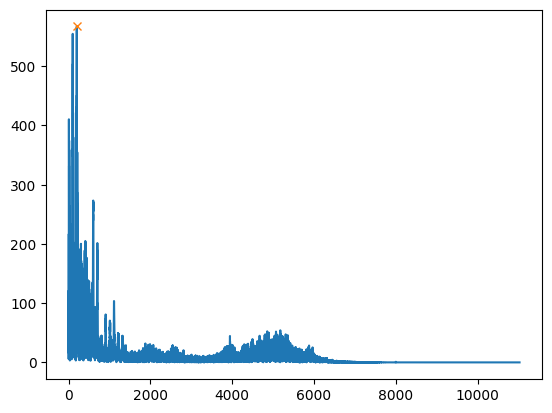

Frequencia fundamental : 198.59262184115522 Hz


In [49]:
yk = abs(np.fft.rfft(y))
freqs = np.arange(len(yk))
freqs = freqs * fs / samples

plt.plot(freqs, yk)
#plt.xlim([3000, 8000])
plt.plot(np.where(yk == max(yk))[0][0]*fs/samples, np.max(yk), "x")
#plt.axvline(x = 45.6, color = 'r')
#plt.axvline(x = 49.6, color = 'r')
plt.show()
print(f'Frequencia fundamental : {np.where(yk == max(yk))[0][0]*fs/samples} Hz')